# Bryce Hill | ECEN 5002

## Comm Lab - **Lab 01**

### 1/23/16

In [1]:
from pylab import *         # Imports numpy (as np) and matplotlib (as mpl)
import numpy as np
%matplotlib inline 
                            # Adds interactive matplotlib backend
plt.rc('text', usetex=True) # Enable the use of LaTeX for plot titles/labels

## Lab Experiment 1: Signals in Python

## -------------------------------------------------------------------------------------------------------------------------------------

### 1. (a) Sine Script File

## -------------------------------------------------------------------------------------------------------------------------------------

In [2]:
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions

/home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions


In [3]:
from sine100 import sine100

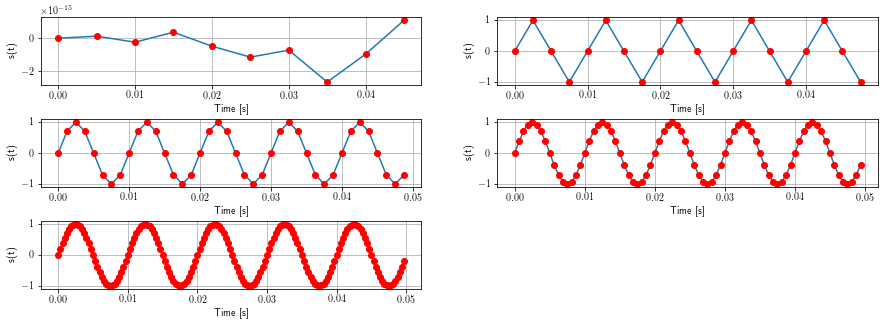

In [4]:
Fs = [200, 400, 800, 1600, 3200]
figure(figsize = [15, 5])
for i in range (0,len(Fs)): # Loop over
    [tt, st] = sine100(Fs[i])
    subplot(3,2,i+1)
    subplots_adjust(hspace=.5)
    plot(tt[:], st[:], tt[:], st[:], 'or'), grid()
    xlabel('Time [s]')
    ylabel('s(t)')

## -------------------------------------------------------------------------------------------------------------------------------------

### 1. (b) Signum 

## -------------------------------------------------------------------------------------------------------------------------------------

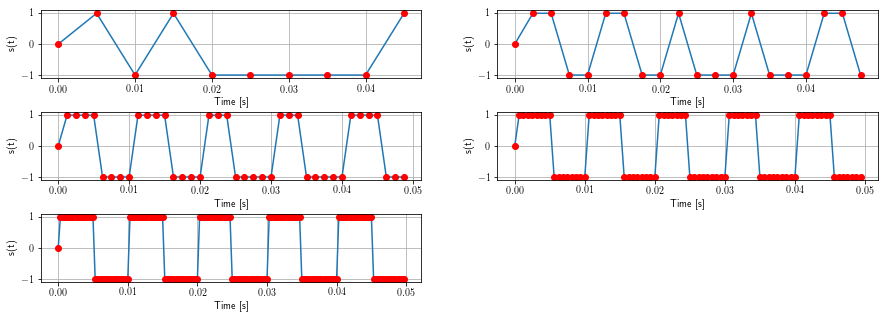

In [5]:
figure(figsize = [15, 5])
for i in range (0,len(Fs)): # Loop over
    [tt, st] = sine100(Fs[i])
    subplot(3,2,i+1)
    subplots_adjust(hspace=.5)
    rt = sign(st)
    plot(tt[:], rt[:], tt[:], rt[:], 'or'), grid()
    xlabel('Time [s]')
    ylabel('s(t)')

## -------------------------------------------------------------------------------------------------------------------------------------

### 1. (c) Integrate & Differentiate Signals

## -------------------------------------------------------------------------------------------------------------------------------------

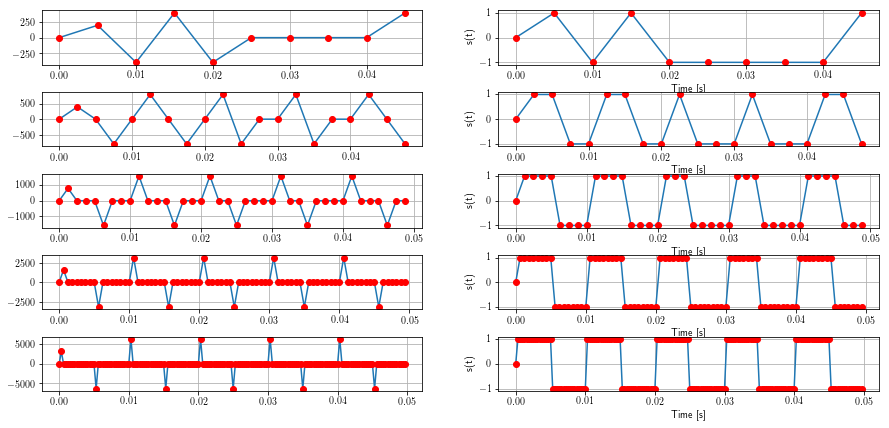

In [6]:
figure(figsize = [15, 7])
j = 0  # Need a dummy index variable for the subplots
for i in range (0,len(Fs)): # Loop over
    [tt, st] = sine100(Fs[i])
    
    rt = sign(st)
    rdt = diff(hstack((0,rt)))*Fs[i]   # Derivative of rt
    rdit = cumsum(rdt)/float(Fs[i])    # Integral of rdt
    
    subplot(5,2,j+1)
    subplots_adjust(hspace=.5)
    plot(tt[:], rdt[:], tt[:], rdt[:], 'or'), grid()
    subplot(5,2,j+2)
    plot(tt[:], rdit[:], tt[:], rdit[:], 'or'), grid()
    j += 2  # Increment by 2 so that the derivative plots are in col 1 & integrals in col 2
    
    xlabel('Time [s]')
    ylabel('s(t)')

## -------------------------------------------------------------------------------------------------------------------------------------

### 1. (d) Read .wav file

## -------------------------------------------------------------------------------------------------------------------------------------

In [7]:
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
from wavfun import wavread
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files
[out, framerate] = wavread("sig01.wav")
print(framerate)

/home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files
3000


Import the file and plot it below to see what we are looking at:

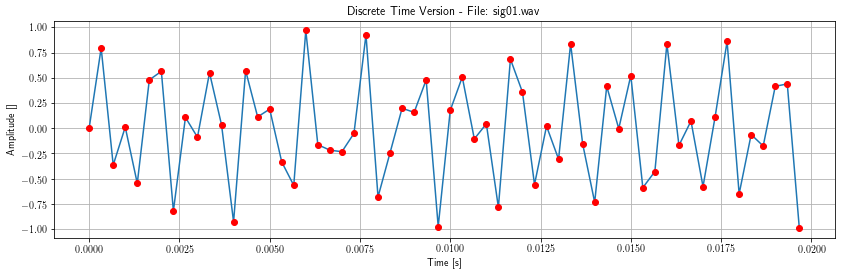

In [8]:
figure(figsize = [14,4])
# Determine sample length and define time vector
dt = 1/framerate
tvec = arange(0, dt*len(out), dt)
plot(tvec, out, tvec, out, 'or'), grid(), xlabel('Time [s]'), ylabel('Amplitude []')
title('Discrete Time Version - File: sig01.wav')

Now, upsample by a factor of 3 and interpolate between the points:

In [9]:
# Let's try this interpolation thingy majiggy
out3at = vstack([out, zeros(len(out)), zeros(len(out))])
out3 = reshape(out3at, out3at.size, order = 'F')
fRate = 3*framerate                  # Determine new sampling rate
tvec3 = arange(0, len(out3))/float(fRate)  # Redefine time vector


Generate a sinc pulse to use in the convolution:

/home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files


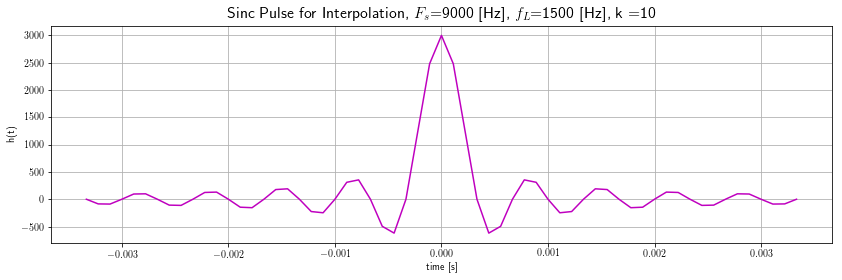

In [10]:
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
from sinc_ipol import sinc
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files

fL = 1500  # Cutoff Frequency 
k = 10     # sinc pulse truncation

[tth, ht] = sinc(fRate, fL, k)

figure(figsize = [14, 4])
plot(tth, ht, 'm'), grid()
xlabel('time [s]'), ylabel('h(t)')
title('Sinc Pulse for Interpolation, $F_s$={:d} [Hz], $f_L$={:d} [Hz], k ={:d}'.format(fRate, fL, k),fontsize=16)
show()

Now, convolve the upsampled data with the sinc pulse and plot the convolved function with the original function to see that they match up

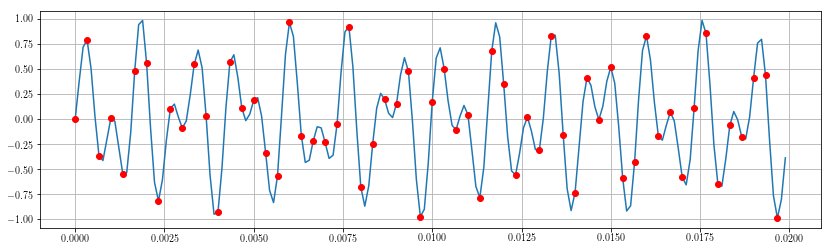

In [11]:
y3t = convolve(out3, ht, 'same')
figure(figsize = [14, 4])
plot(tvec3, y3t/float(framerate)), grid()
plot(tvec, out, 'or')

## Lab Experiment 2: Flat-top PAM 

## -------------------------------------------------------------------------------------------------------------------------------------

### 2. (a) Develop python script to convert a text string to a flat-top PAM signal

## -------------------------------------------------------------------------------------------------------------------------------------

In [12]:
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
from ftpam01 import ftpam
from ascfun import asc2bin
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files

/home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files


In [13]:
mystring = 'Fl'
dn = asc2bin(mystring)
print(dn)

[0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0]


As a quick check of the asc2bin() function, the string 'FL' was passed through and indeed produces the appropriat ASCII code as 0b01000110 = F and 0b01101100 = l

In [14]:
Fs = 44100      # Sampling rate for s(t)
Fb = 100        # Bit rate for dn sequence
txt = 'MyTest'  # Input text string
tt, st = ftpam(Fs, Fb, txt)

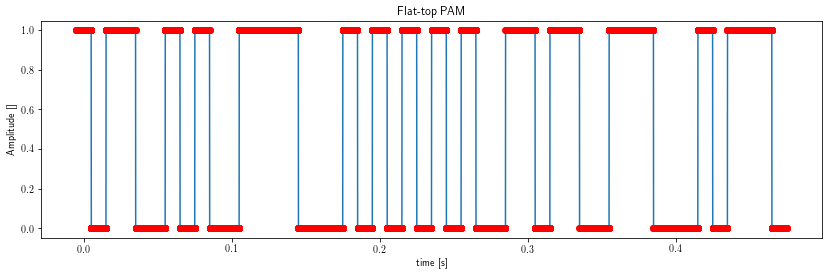

In [15]:
figure(figsize = [14, 4])
plot(tt, st)
plot(tt, st, 'or')
xlabel('time [s]')
ylabel('Amplitude []')
title('Flat-top PAM')

In [16]:
%cd /home/bryce/Documents/class/CommLab/Lab_1/My_Functions
import wavfun as wf
%cd /home/bryce/Documents/class/CommLab/Lab_1/wav_files

[Errno 2] No such file or directory: '/home/bryce/Documents/class/CommLab/Lab_1/My_Functions'
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files
[Errno 2] No such file or directory: '/home/bryce/Documents/class/CommLab/Lab_1/wav_files'
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files


Write the waveform which ftpam01 generated to a file for later use

In [17]:

wf.wavwrite(0.999*st/float(max(abs(st))), Fs, 'MyTest.wav') # Write wav-file

## -------------------------------------------------------------------------------------------------------------------------------------

### 2. (b) Develop python script to convert a flat-top PAM signal to a text string

## -------------------------------------------------------------------------------------------------------------------------------------

In [18]:
[rt, Fs] = wf.wavread('MyTest.wav')

Plot waveform to make sure it looks good:

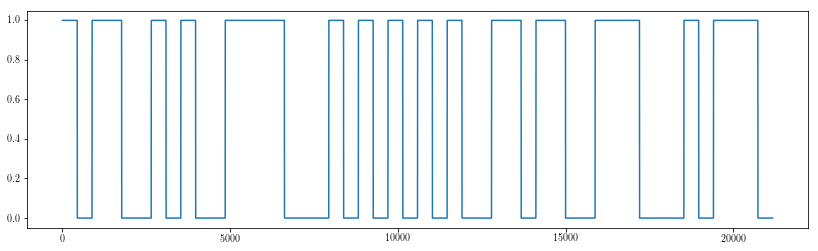

In [19]:
figure(figsize = [14, 4])
plot((arange(0, len(rt))), rt)

In [20]:
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
from ftpam_rcvr01 import wav2ascii
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files

/home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files


In [21]:
Fb = 100  # Data bit rate
dum = wav2ascii('MyTest.wav', Fb)

# of Samples: 21168
Bytes in File:  6.0
numTpBit:  441
num2avg:  110
# of Bits:  48
Binary String:  [  77.  121.   84.  101.  115.  116.]
ASCII txt    :   MyTest


Now that ftpam_rcvr01 is working, use it to recieve the signal ftpam_sig01.wav and convert it to a text string. 

In [22]:
dum = wav2ascii('ftpam_sig01.wav', Fb)

# of Samples: 35281
Bytes in File:  10.0
numTpBit:  441
num2avg:  110
# of Bits:  80
Binary String:  [  78.  101.  116.  119.  111.  114.  107.  105.  110.  103.]
ASCII txt    :   Networking


## -------------------------------------------------------------------------------------------------------------------------------------

### 2. (c) Recieve noisy signals and convert to text strings

## -------------------------------------------------------------------------------------------------------------------------------------

Demonstrate ability of wav2ascii() to determine the bit rate of a signal when none is provided at function call

In [23]:
dum = wav2ascii('ftpam_sig02.wav', 0)

# of Samples: 23521
#bits/Sample:  147   (Determined by wav2ascii())
Bytes in File:  20.0
numTpBit:  147
num2avg:  36
# of Bits:  160
Binary String:  [  87.  104.  111.   32.  105.  115.   32.   84.  117.  110.   97.   32.
   34.   80.  104.  105.  115.  104.   34.   63.]
ASCII txt    :   Who is Tuna "Phish"?


Demonstrate ability of wav2ascii() to handle a noisy signal

In [24]:
dum = wav2ascii('ftpam_sig03.wav', 100)

# of Samples: 59977
Bytes in File:  17.0
numTpBit:  441
num2avg:  110
# of Bits:  136
Binary String:  [  67.  111.  115.  109.  105.   99.   32.   68.  117.  115.  116.   98.
  117.  115.  116.  101.  114.]
ASCII txt    :   Cosmic Dustbuster


## Lab Experiment 3: Pulse Code Modulation (PCM)

## -------------------------------------------------------------------------------------------------------------------------------------

### 3. (a) Generate Sine wave signal for testing mt2pcm function

## -------------------------------------------------------------------------------------------------------------------------------------

In [25]:
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
from sine100 import sineGen
from pcmfun import mt2pcm
from pcmfun import pcm2mt
%cd /home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files

/home/bryce/Documents/Class/Signal_Processing/Lab_1/My_Functions
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files


First, use 3 bit quantization to test both pcm2mt & mt2pcm

In [26]:
numBits = 3

Fs = 8000  # Sampling Frequency
fm = 400   # Sine Frequency
tlen = .01 # Time Interval

# Generate the sine function
[tt, mt] = sineGen(Fs, fm, tlen)

# Call mt2pcm to get PCM representation of the Sine waveform
dn = mt2pcm(mt, numBits)

even# of quantizations


-- ** Plot results of mt2pcm function** --


([<matplotlib.lines.Line2D at 0x7fddc7b64b38>], None)

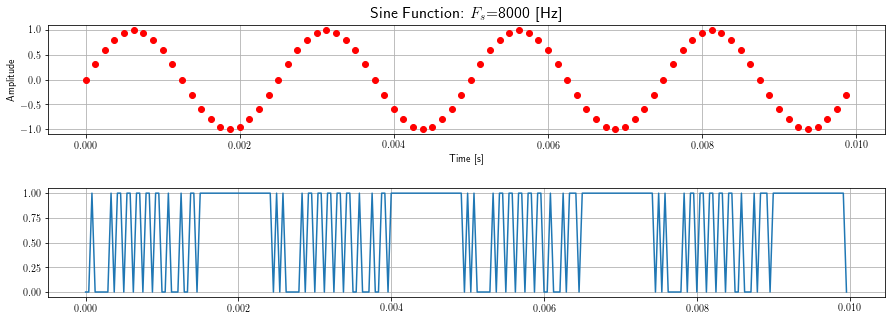

In [27]:
tt3 = arange(0, tlen, 1/(Fs*numBits))
figure(figsize = (15,5))
subplot(2,1,1)
subplots_adjust(hspace=.5)
plot(tt, mt, 'or'), grid(), xlabel('Time [s]'), ylabel('Amplitude'), title(r'Sine Function: $F_s$={:d} [Hz]'.format(Fs),fontsize=16)
subplot(2,1,2)
plot(tt3, dn), grid()

In [28]:
mt2 = pcm2mt(dn, numBits)

even# of quantizations


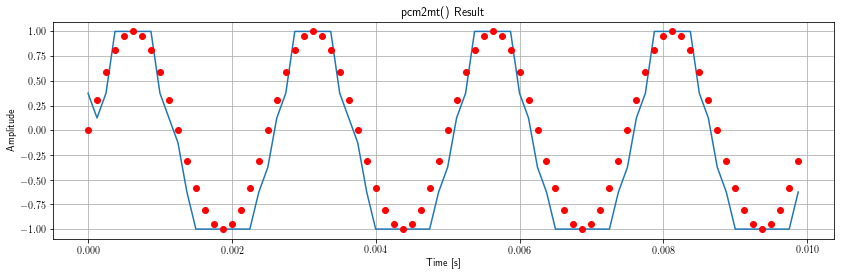

In [29]:
figure(figsize = (14,4))
plot(tt, mt2, label='pcm2mt')
plot(tt, mt, 'or', label='Original Sine'), grid()
xlabel('Time [s]')
ylabel('Amplitude')
title('pcm2mt() Result')

* note, I can't get labels to work at the moment but the red is the original sine and the blue is the sine fit generated from the pcm2mt function

Now, use 8 bit quantization to test both pcm2mt & mt2pcm

In [30]:
numBits = 8

# Call mt2pcm to get PCM representation of the Sine waveform
dn = mt2pcm(mt, numBits)

even# of quantizations


-- ** Plot results of mt2pcm function** --


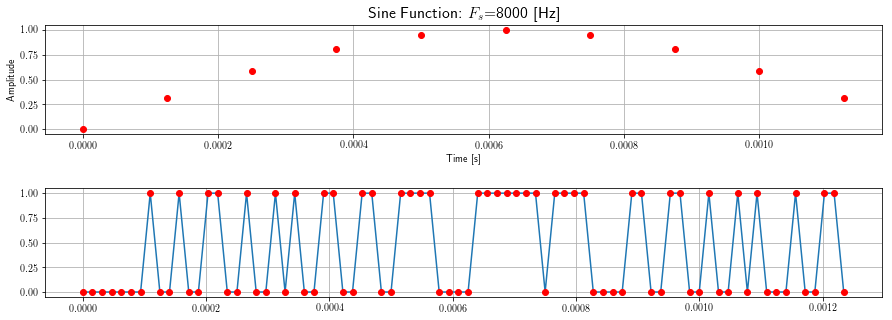

In [31]:
tt3 = arange(0, tlen, 1/(Fs*numBits))
divisor = 8
figure(figsize = (15,5))
subplot(2,1,1)
subplots_adjust(hspace=.5)
plot(tt[0:int(len(tt)/divisor)], mt[0:int(len(tt)/divisor)], 'or'), grid(), xlabel('Time [s]'), ylabel('Amplitude'), title(r'Sine Function: $F_s$={:d} [Hz]'.format(Fs),fontsize=16)
subplot(2,1,2)
plot(tt3[0:int(len(tt3)/divisor)], dn[0:int(len(tt3)/divisor)]), grid()
plot(tt3[0:int(len(tt3)/divisor)], dn[0:int(len(tt3)/divisor)], 'or')

In [32]:
print(dn[0:40])

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.
  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.
  1.  0.  0.  0.]


In [33]:
mt2 = pcm2mt(dn, numBits)

even# of quantizations


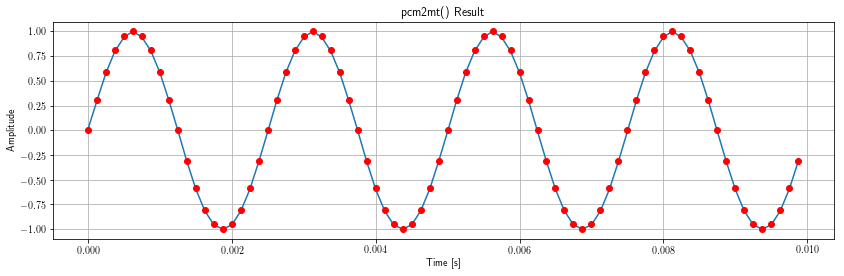

In [34]:
figure(figsize = (14,4))
plot(tt, mt2, label='pcm2mt')
plot(tt, mt, 'or', label='Original Sine'), grid()
xlabel('Time [s]')
ylabel('Amplitude')
title('pcm2mt() Result')

* note, I can't get labels to work at the moment but the red is the original sine and the blue is the sine fit generated from the pcm2mt function

## -------------------------------------------------------------------------------------------------------------------------------------

### 3. (b) Add noise to PCM functions from section 3. (a)

## -------------------------------------------------------------------------------------------------------------------------------------

In [35]:
# Import the function that I wrote to convert a waveform to a binary string
%cd /home/bryce/Documents/class/CommLab/Lab_1/My_Functions
from ftpam_rcvr01 import wav2bin
%cd /home/bryce/Documents/class/CommLab/Lab_1/wav_files

[Errno 2] No such file or directory: '/home/bryce/Documents/class/CommLab/Lab_1/My_Functions'
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files
[Errno 2] No such file or directory: '/home/bryce/Documents/class/CommLab/Lab_1/wav_files'
/home/bryce/Documents/Class/Signal_Processing/Lab_1/wav_files


Run wav2bin function on the waveform

In [36]:
dn_sig01 = wav2bin('pcm_sig01.wav', 64000)
tdn_sig01 = arange(0,len(dn_sig01))

# of Samples: 665600
Bytes in File:  10400.0
numTpBit:  8
num2avg:  2
# of Bits:  83200


Perform un-quantization to convert back to an analog signal

In [37]:
numBits = 8
mt_sig01 = pcm2mt(dn_sig01, numBits)

even# of quantizations


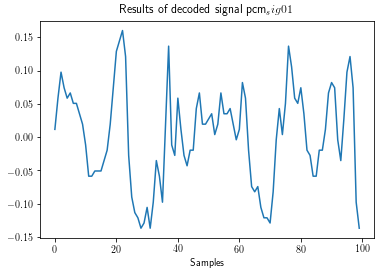

In [38]:
tmt_sig01 = arange(0, len(mt_sig01))
plot(tmt_sig01[0:100], mt_sig01[0:100])
title('Results of decoded signal pcm_sig01')
xlabel('Samples')
wf.wavwrite(0.999*mt_sig01/float(max(abs(mt_sig01))), 64000, '3b_sig01.wav') # Write wav-file

Run wav2bin function on the waveform

In [39]:
dn_sig02 = wav2bin('pcm_sig02.wav', 64000)
tdn_sig02 = arange(0,len(dn_sig02))

# of Samples: 665600
Bytes in File:  10400.0
numTpBit:  8
num2avg:  2
# of Bits:  83200


Perform un-quantization to convert back to an analog signal

In [40]:
numBits = 8
mt_sig02 = pcm2mt(dn_sig02, numBits)

even# of quantizations


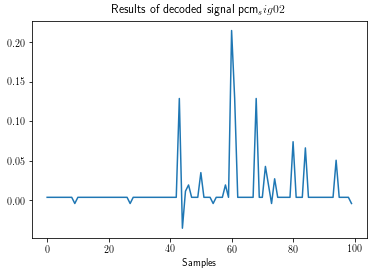

In [41]:
tmt_sig02 = arange(0, len(mt_sig02))
plot(tmt_sig02[0:100], mt_sig02[0:100])
title('Results of decoded signal pcm_sig02')
xlabel('Samples')
wf.wavwrite(0.999*mt_sig02/float(max(abs(mt_sig02))), 64000, '3b_sig02.wav') # Write wav-file

### Conclusion: Signals pcm_sig01/02
Neither of these waveforms produce any intelligible audio for me. 

even# of quantizations


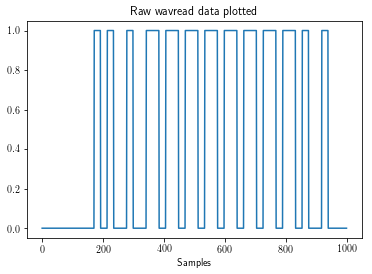

In [42]:
# Moving to second part of 3.(b)
numBits = 3
[rt_test01, Fs_test01] = wf.wavread('pcm_test01.wav')
t_test01 = arange(0, len(rt_test01))
plot(t_test01[0:1000], rt_test01[0:1000])
title('Raw wavread data plotted')
xlabel('Samples')
mt_test01 = pcm2mt(rt_test01, numBits)

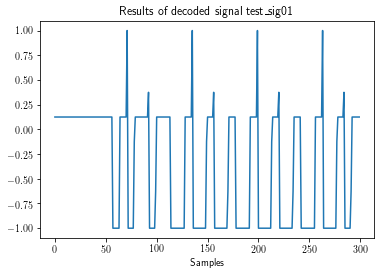

In [43]:
tmt_test01 = arange(0, len(mt_test01))
plot(tmt_test01[0:300], mt_test01[0:300])
title('Results of decoded signal test\_sig01')
xlabel('Samples')

even# of quantizations


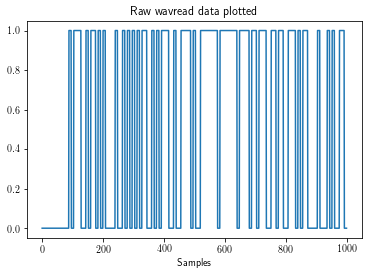

In [44]:
# And now import the pcm_test02.wab
numBits = 8
[rt_test02, Fs_test02] = wf.wavread('pcm_test02.wav')
t_test02 = arange(0, len(rt_test02))
plot(t_test02[0:1000], rt_test02[0:1000])
title('Raw wavread data plotted')
xlabel('Samples')
mt_test02 = pcm2mt(rt_test02, numBits)

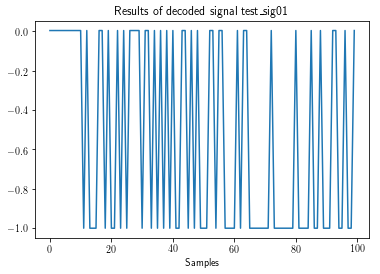

In [45]:
tmt_test02 = arange(0, len(mt_test02))
plot(tmt_test02[0:100], mt_test02[0:100])
title('Results of decoded signal test\_sig01')
xlabel('Samples')

### Conclusion: Signals pcm_test01/02

I am again unsure as to the results of the processing of these signals. My pcm2mt and mt2pcm functions worked well in part 3.(a) but in 3.(b) the sound waves didn't produce anything intelligible and the results from pcm_test01/02.wav don't match up with the described sine function. But again, since it worked in part 3.(a) I am stumped as to where it is malfunctioning with these signals. 